# One-Hot Encoding


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

csv_file_path = "trade.csv"
trade = pd.read_csv(csv_file_path)

In [5]:
print(trade['국가명'].head())

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


pandas `get_dummies` 함수 사용 원-핫-인코딩 하기

In [8]:
country = pd.get_dummies(trade['국가명'])
country.head()

,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


`pd.concat` 함수 사용 데이터프레임 trade와 country 합쳐주기

In [9]:
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항,미국,일본,중국
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN,0,0,1
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN,1,0,0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN,0,1,0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN,0,0,1
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN,1,0,0


In [ ]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

# 구간화

In [11]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])


<AxesSubplot:>

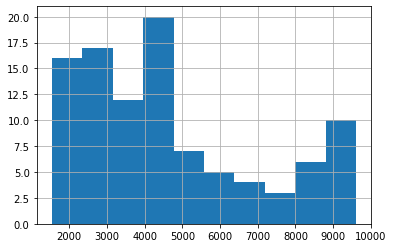

In [12]:
salary.hist()

In [13]:
bins = [0, 2000, 4000, 6000, 8000, 10000]

ctg = pd.cut(salary, bins=bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

In [14]:
print('salary[0] : ', salary[0])
print('salary[0]가 속한 카테고리 : ', ctg[0])

salary[0] :  4300
salary[0]가 속한 카테고리 :  (4000, 6000]


In [15]:
# 각 구간별 값 개수 구하기
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

In [17]:
ctg = pd.cut(salary, bins=6)
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64, right]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] < (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [18]:
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
dtype: int64

In [ ]:
ctg = pd.qcut(salary, q=5)
ctg

print(ctg.value_counts().sort_index())